In [1]:
%matplotlib inline
import os

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.3.1


In [2]:
imagepaths = []

for root, dirs, files in os.walk(".", topdown = False):
    for name in files:
        path = os.path.join(root, name)
        if path.endswith("png"):
            imagepaths.append(path)
            
print(len(imagepaths))

20000


In [3]:
def plot_image(path):
    img = cv2.imread(path)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(img_cvt.shape)
    plt.grid(False)
    plt.imshow(img_cvt)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + path)

(240, 640)


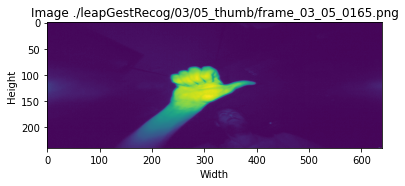

In [4]:
plot_image(imagepaths[0])

In [5]:
X = []
y = []

for path in imagepaths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (320, 120))
    X.append(img)
    
    category = path.split("/")[3]
    label = int(category.split("_")[0][1])
    y.append(label)
    
X = np.array(X, dtype = "uint8")
X = X.reshape(len(imagepaths), 120, 320, 1)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0])

Images loaded:  20000
Labels loaded:  20000
5 ./leapGestRecog/03/05_thumb/frame_03_05_0165.png


In [6]:
ts = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 42)

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [11]:
model = Sequential()
model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (120,320,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64, verbose = 2, validation_data = (X_test, y_test))


Epoch 1/5
219/219 - 268s - loss: 0.5916 - accuracy: 0.9395 - val_loss: 0.0116 - val_accuracy: 0.9965
Epoch 2/5
219/219 - 290s - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0413 - val_accuracy: 0.9947
Epoch 3/5
219/219 - 269s - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.0600 - val_accuracy: 0.9898
Epoch 4/5
219/219 - 268s - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.0118 - val_accuracy: 0.9983
Epoch 5/5
219/219 - 274s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0122 - val_accuracy: 0.9980


In [14]:
model.save('handrecognition_model.h5')

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

188/188 [==============================] - 26s 139ms/step - loss: 0.0122 - accuracy: 0.9980


In [16]:
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

Test accuracy: 99.80%


In [17]:
predictions = model.predict(X_test)

In [18]:
np.argmax(predictions[0]), y_test[0]

(1, 1)

In [26]:
def validate_9_images(predictions_array, true_label_array, img_array):
    class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
    plt.figure(figsize=(15,5))
    
    for i in range(1,10):
        pred = predictions_array[i]
        true_label = true_label_array[i]
        img = img_array[i]
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
        plt.subplot(3,3,i)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img, cmap = plt.cm.binary)
        
        predicted_label = np.argmax(pred)
        
        if predicted_label == true_label:
            color = 'blue'
        else: 
            color = 'red'
            
        plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(pred),
                                  class_names[true_label]),
                                  color=color)
        plt.show()

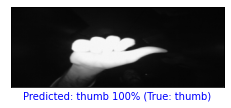

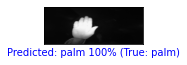

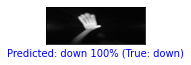

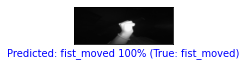

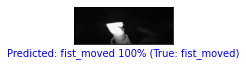

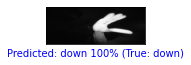

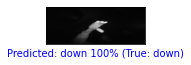

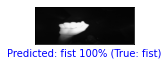

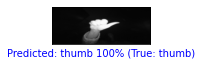

In [27]:
validate_9_images(predictions, y_test, X_test)

In [28]:
y_pred = np.argmax(predictions, axis = 1)

In [29]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,596,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,591,0,0,0,0,0,0,0,0
Actual L,0,0,604,3,2,0,2,0,0,0
Actual Fist (H),0,0,0,621,0,0,0,0,0,0
Actual Fist (V),0,0,0,1,603,0,0,0,0,0
Actual Thumbs up,0,0,0,1,0,604,0,0,0,0
Actual Index,0,0,0,2,0,0,584,0,0,0
Actual OK,0,0,0,0,0,0,0,568,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,600,0
Actual C,0,0,1,0,0,0,0,0,0,617
